# Part I - (Ford GoBike System Data Exploration)
## by ( NANCHI GUMUT)

## Introduction to dataset 

##Table of content
1. Loading Libraries
2. Gathering Data
3. Assessing Data
4. findings made in Ford GoBike System Dataset 
5. Cleaning Data
6. Storing Data
    .
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


# 1. Loading Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests
from matplotlib.ticker import FixedLocator, MaxNLocator
import io

%matplotlib inline

# 2. Gathering Data
     
Ford GoBike Sysytem is a comapny that shares bike to the public  covering the greater part of San Francisco Bay area. 
This dataset  explores information containing  biketrips of individauls from Ford GoBike system.
This dataset has been uploaded to get some data wrangling in order to make it tidy for analysis,exploration and a good viualisation.

<h3>Loaded Ford GoBike Data into a dataframe</h3>

In [2]:
#Load csv file into a dataframe
biketrips = pd.read_csv("201902-fordgobike-tripdata.csv")

<h3>Initial Data Exploration</h3>
<h4>I will be exploring for :<h4/>
 <ol>
  <li>Shape and size of dataset</li><br>
  <li>Datatypes of columns</li><br>
  <li>First 5 rows</li><br>
  <li>Last 5 rows</li><br>
  <li>Description of the data</li>
</ol>

In [3]:

print('\033[1m1. **********Shape**********\n\033[0m')
print(biketrips.shape)
print('\033[1m\n2. **********Types**********\n\033[0m')
print(biketrips.dtypes)
print('\033[1m\n3. **********Top 5**********\n\033[0m')
print(biketrips.head(5))
print('\033[1m\n4. **********Bottom 5**********\n\033[0m')
print(biketrips.tail(5))
print('\033[1m\n5. **********Describe Data**********\n\033[0m')
print(biketrips.describe())


1. **********Shape**********

(183412, 16)

2. **********Types**********

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

3. **********Top 5**********

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.

# Assessing Data
# high-level overview of data shape and composition
    assesssing dataset of 2019.
    

In [4]:
biketrips.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
biketrips.duplicated().sum()

0

# 4 # findings as to Ford GoBike Sysytem Dataset

1. Male gender features prominently the dataset with a count of 130651
2. Other gender has the least count of 3652
3. Female has a count of 40844


1. Subscriber features prominently the dataset with a count of 163544
2. Customer has the least count of 19868


# 5 Storing Data 

creating Dataframe Copies

In [6]:
biketrips_clean = biketrips.copy()

# 6. Cleaning Data

In [7]:
biketrips_clean = biketrips_clean.dropna()

In [8]:

biketrips_clean['start_time'] = pd.to_datetime(biketrips['start_time'])
biketrips_clean['end_time'] = pd.to_datetime(biketrips['end_time'])

biketrips_clean['start_station_id'] = biketrips['start_station_id'].astype('str')
biketrips_clean['end_station_id'] = biketrips['end_station_id'].astype('str')
biketrips['bike_id'] = biketrips['bike_id'].astype('str')

biketrips_clean['user_type'] = biketrips['user_type'].astype('category')
biketrips_clean['member_gender'] = biketrips['member_gender'].astype('category')
biketrips_clean['bike_share_for_all_trip'] = biketrips['bike_share_for_all_trip'].astype('category')

biketrips_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(2), ob

In [9]:
biketrips_clean['duration_minute'] = biketrips_clean['duration_sec']/60
biketrips_clean['start_date'] = biketrips_clean.start_time.dt.strftime('%Y-%m-%d')
biketrips_clean['start_hour_of_the_day'] = biketrips_clean.start_time.dt.strftime('%H')
biketrips_clean['start_day_per_week'] = biketrips_clean.start_time.dt.strftime('%A')
biketrips_clean['start_month'] = biketrips_clean.start_time.dt.strftime('%B')
biketrips_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_the_day,start_day_per_week,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,February


In [10]:
biketrips_clean['period'] = (biketrips_clean['start_time'].dt.hour % 24 + 4) // 4
biketrips_clean['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
biketrips_clean.head(5)




,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_the_day,start_day_per_week,start_month,period
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February,Noon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February,Night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,February,Night


In [11]:
#Get current age of  bikers as at when data was collected i.e 2019
biketrips_clean['member_age'] = 2019 - biketrips_clean['member_birth_year']
biketrips_clean.describe()


,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_minute,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135,11.733379,34.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731,27.370082,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000,1.016667,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000,5.383333,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,8.500000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000,13.150000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,141.000000


In [12]:
age_intervals=np.arange(18, biketrips_clean['member_age'].max()+5,5).astype(int)
age_labels=[f'{age_intervals[i]}-{age_intervals[i+1]}' for i in range (len(age_intervals)-1)]
biketrips_clean['age_intervals']=pd.cut(biketrips_clean['member_age'],age_intervals, labels=age_labels, include_lowest=True)
biketrips_clean['age_intervals'].value_counts().sort_index()

18-23      15534
23-28      41126
28-33      43784
33-38      28864
38-43      16738
43-48      11049
48-53       7235
53-58       5662
58-63       3146
63-68        962
68-73        482
73-78        167
78-83         14
83-88        111
88-93          3
93-98          0
98-103         3
103-108        0
108-113        1
113-118       17
118-123       53
123-128        0
128-133        0
133-138        0
138-143        1
Name: age_intervals, dtype: int64

### What is the structure of your dataset?

The Ford GoBike System Dataset has 183412 rows and  16 columns

There are 11 numeric variables (duration_sec, start_time, end_time, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id, member_birth_year) and 5 categoric variables (start_station_name, end_station_name, user_type, member_gender,bike_share_for_all_trip)


### What is/are the main feature(s) of interest in your dataset?
My core interest in  this dataset is to figure out how duration of trip is affected by member_birth_year/member_age,member_gender, user_type and bike_share_for_all_trip 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that age of rider will affect the duration of ride the most. I also expect the male gender to have a longer duration of rides.


## Univariate Exploration

<b>1 Exploring member_gender variable</b>

In [13]:
biketrips_clean.groupby(['member_gender'])['member_gender'].count()

member_gender
Female     40805
Male      130500
Other       3647
Name: member_gender, dtype: int64

In [14]:
def countPlot(data, x, color, order=None):
    plt.figure(figsize=[14,6])
    sb.countplot(data=data,edgecolor='black', x=x, color=color, order=order);
    x=x.replace('_',' ')
    plt.title(f'''Distribution of {x} '''.title(), fontsize=14, weight='bold')
    plt.xlabel(x.title(),fontsize=10, weight='bold')
    plt.ylabel('Frequency'.title(),fontsize=10, weight='bold')
    #plt.xlabel(xlabel);
    #plt.ylabel(ylabel);
    #plt.xticks(rotation=45)

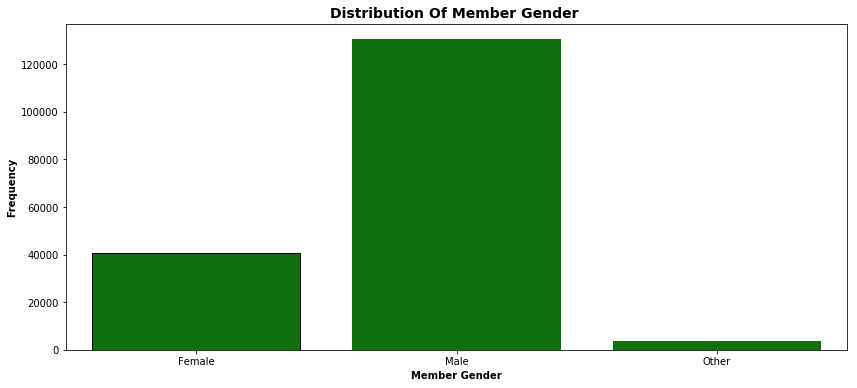

In [15]:
countPlot(data=biketrips_clean, x='member_gender', color='green')

<b>Findings</b>
<ol>
  <li>Male gender features prominently the dataset with a count of 130500</li>
  <li>'Other' gender has the least count of 3647</li>
  <li>Female has a count of 40805</li>
</ol>

<b>2 Exploring User Type count</b>

In [16]:
biketrips_clean.groupby(['user_type'])['user_type'].count()

user_type
Customer       16566
Subscriber    158386
Name: user_type, dtype: int64

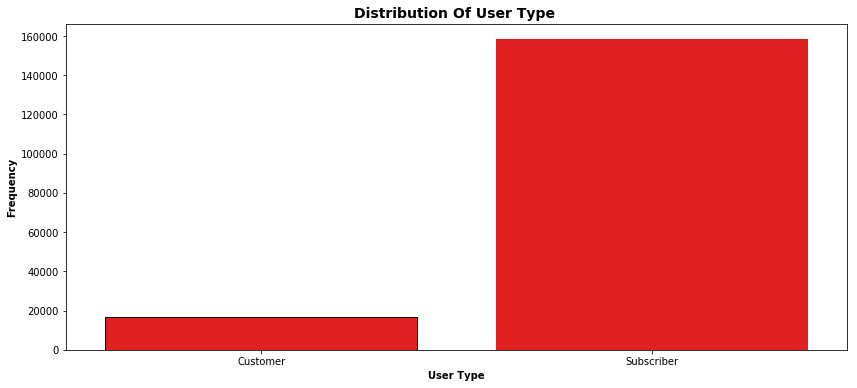

In [17]:
countPlot(data=biketrips_clean, x='user_type', color='red')

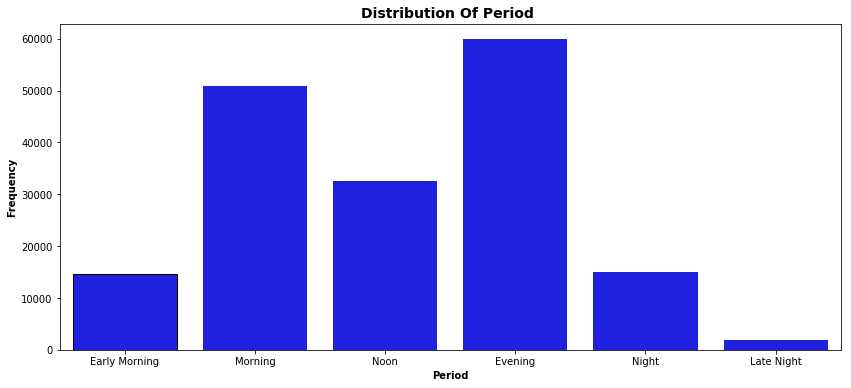

In [18]:
countPlot(data=biketrips_clean, x='period', color='blue', order=[
                       'Early Morning',
                       'Morning',
                      'Noon',
                      'Evening',
                       'Night', 'Late Night'])

<b>Findings</b>
<ol>
  <li>Subscriber features prominently the dataset with a count of 158386</li>
  <li>Customer has the least count of 16566</li>
     <li>Most rides occur in the evening and mornings</li>
</ol>

<b>3 Exploring member_birth_year/ member age</b>

In [19]:
#Describe member age
member_age_df =biketrips_clean['member_age']
member_age_df.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [20]:
member_age_df.groupby(pd.cut(biketrips_clean['member_age'], np.arange(18,141,5))).count()

member_age
(18, 23]      15500
(23, 28]      41126
(28, 33]      43784
(33, 38]      28864
(38, 43]      16738
(43, 48]      11049
(48, 53]       7235
(53, 58]       5662
(58, 63]       3146
(63, 68]        962
(68, 73]        482
(73, 78]        167
(78, 83]         14
(83, 88]        111
(88, 93]          3
(93, 98]          0
(98, 103]         3
(103, 108]        0
(108, 113]        1
(113, 118]       17
(118, 123]       53
(123, 128]        0
(128, 133]        0
(133, 138]        0
Name: member_age, dtype: int64

Text(0.5,1,'Distribution Of Age ')

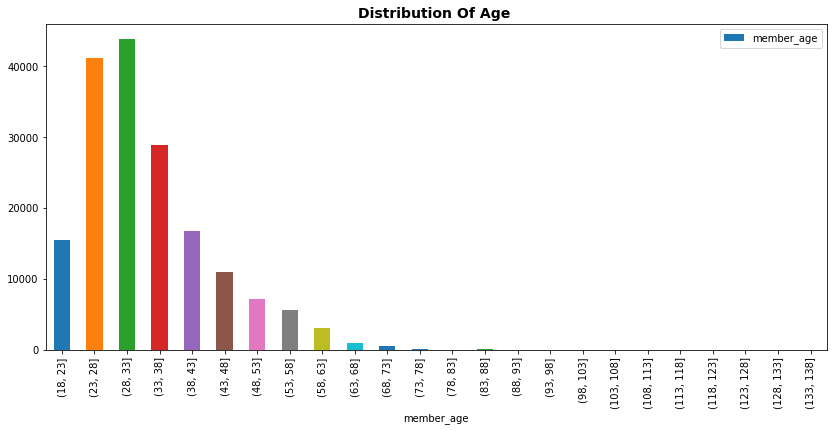

In [43]:
 plt.figure(figsize=[14,6])
member_age_df.groupby(pd.cut(biketrips_clean['member_age'], np.arange(18,141,5))).count().plot.bar(legend=True)
plt.title(f'''Distribution of Age '''.title(), fontsize=14, weight='bold')

<b>Findings</b>
<ol>
  <li>The count increases as age and peaks between 28 and 33 years old</li>
  <li>28 to 33 year olds have the most count</li>
  <li>The count steeply decreases as bikers age increase beyond age 40</li>
</ol>

<b>4 Exploring duration of rides</b>

In [22]:
duration_minute_df =biketrips_clean['duration_minute']
duration_minute_df.describe()


count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minute, dtype: float64

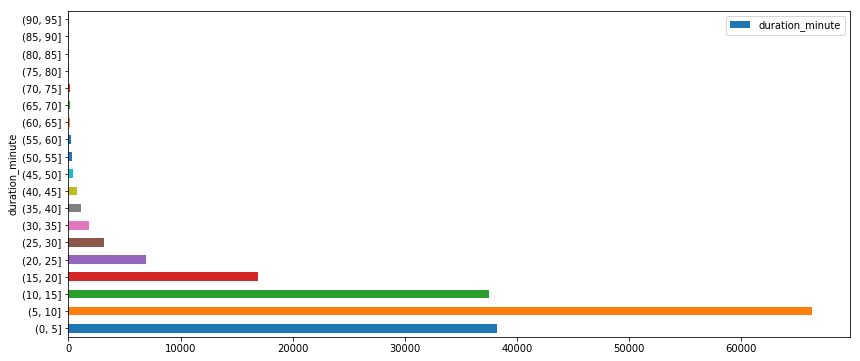

In [23]:
plt.figure(figsize=[14,6])
duration_minute_df.groupby(pd.cut(biketrips_clean['duration_minute'], np.arange(0,100,5))).count().plot.barh(legend=True)

<b>Findings</b>
<ol>
  <li>The average duration of ride is 726 sec/  11.733379 min</li>
    <li>The shortest ride was 61 sec/1.016667 min</li>
     <li>The longest ride was 85444 sec/ 1409.133333 min</li>
</ol>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

<ol>
  <li>Converted date columns to datetime datatype and separated out time and date components</li>
    <li>Identified and converted category variables to category datatype</li>
     <li>Converted duration in secs to minutes</li>

</ol>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<ol>
    <li>Computed member age from member date of birth</li>
    <li>Grouped member age to groups of 5 for easier analysis</li>
    <li>Converted Start_time to period of the day</li>
</ol>



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In this section of variate, I shall  be  looking at the duration in seconds correlations  between the features such as: age, start station, end station, user type, and gende in the data.



In [24]:
numeric_vars = ['duration_sec','member_birth_year','duration_minute','member_age']
categoric_vars = ['user_type', 'member_gender','bike_share_for_all_trip', 'period']


<b>4 Exploring member_birth_year/member_age</b>

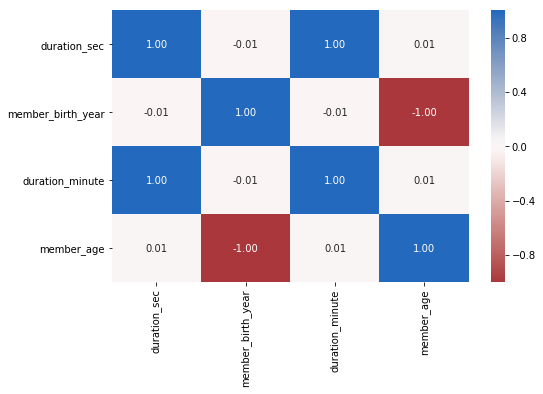

In [25]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(biketrips_clean[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [26]:
print("biketrips.shape=",biketrips_clean.shape)
biketrips_samp = biketrips_clean.sample(n=1000, replace = False)

biketrips.shape= (174952, 24)


In [27]:
biketrips_samp['member_age'].describe()

count    1000.00000
mean       34.27200
std        10.37669
min        19.00000
25%        27.00000
50%        32.00000
75%        39.00000
max       119.00000
Name: member_age, dtype: float64

In [28]:
biketrips_samp['duration_minute'].describe()

count    1000.000000
mean       11.799717
std        31.293647
min         1.016667
25%         5.079167
50%         8.100000
75%        12.829167
max       858.133333
Name: duration_minute, dtype: float64

Text(0.5,1,'Member Age Vs Duration(Minute)')

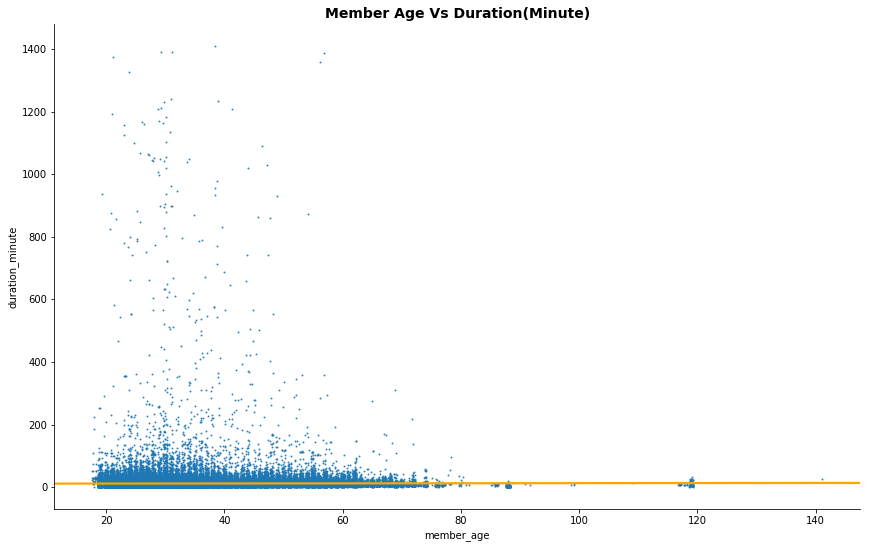

In [29]:
g=sb.lmplot(data=biketrips_clean,x="member_age", y="duration_minute", 
            x_jitter=0.35,scatter_kws={'s':1}, line_kws={'color':'orange'})
g.fig.set_size_inches(14,8)
plt.title('Member Age Vs Duration(Minute)'.title(), fontsize=14, weight='bold')

In [30]:
#My sb or numpy version has a bug and could not run without error/warning

#plt.figure(figsize=(24,6))
#sb.stripplot(data=biketrips_clean, x='age_intervals', y='duration_minute', hue='member_gender',size=2,jitter=0.35,dodge=True)
#plt.title('Relationship between member_age,duration and gender'.title(), fontsize=15,fontweight='bold')
#plt.xlabel('member_age')
#plt.ylabel('duration(minutes)')
#plt.show()

Text(0.5,1,'Member Age Vs Duration(Minute) (Excluding Outliers)')

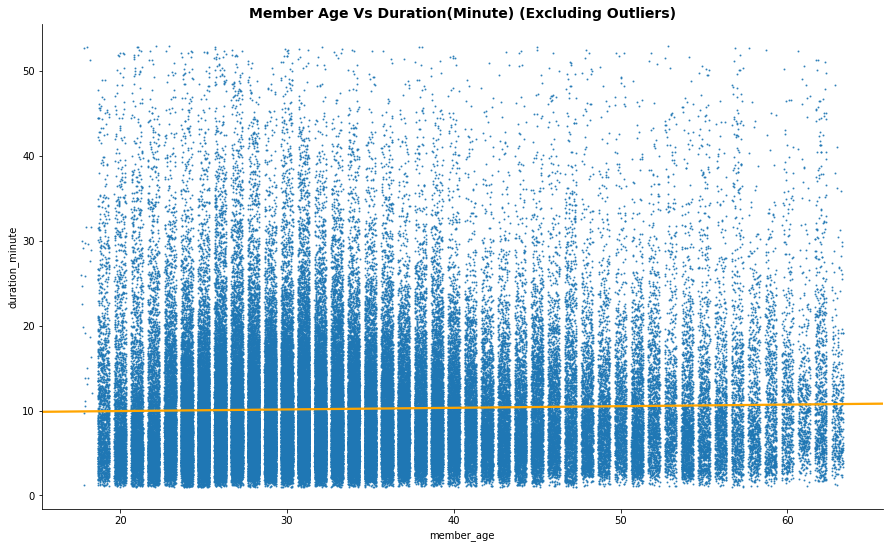

In [31]:
g=sb.lmplot(data=biketrips_clean.query('member_age<member_age.quantile(0.99) and duration_minute<duration_minute.quantile(0.99)'), x='member_age' , y= 'duration_minute',
x_jitter=0.35,scatter_kws={'s':1}, line_kws
={'color' :'orange'})
g.fig.set_size_inches(14,8);
plt.title('Member Age Vs Duration(Minute) (Excluding Outliers)'.title(), fontsize=14, weight='bold')

<b>Findings</b>
<ol>
  <li>A larger proportion of the distribution is between the age of 20 and 40</li>
     <li>A higher duration was also spent on rides by the same group </li>
</ol>

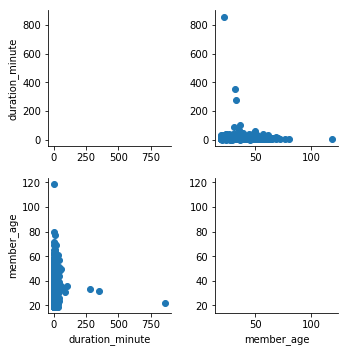

In [32]:
binsize = 10

g = sb.PairGrid(data = biketrips_samp, vars = ['duration_minute','member_age'])
g.map_offdiag(plt.scatter)

In [33]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

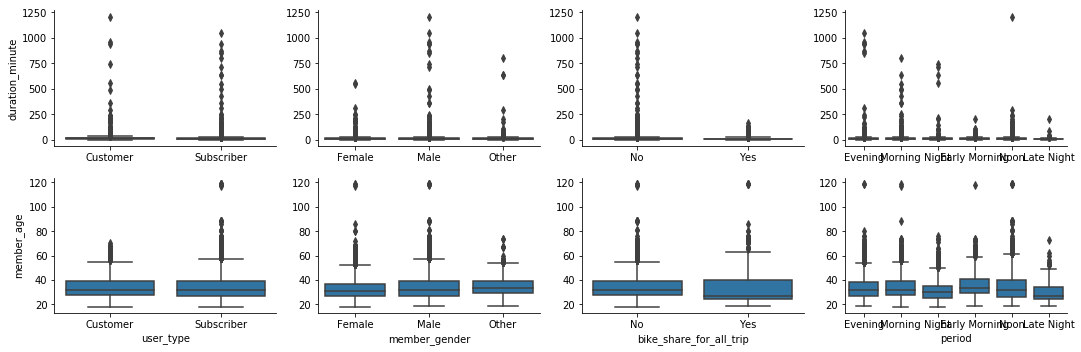

In [34]:
# plot matrix of numeric features against categorical features.
biketrips_samp = biketrips_clean.sample(n=20000, replace = False)
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = biketrips_samp, y_vars = ['duration_minute','member_age'], x_vars = categoric_vars, aspect = 1.5)
g.map(boxgrid)
plt.show();

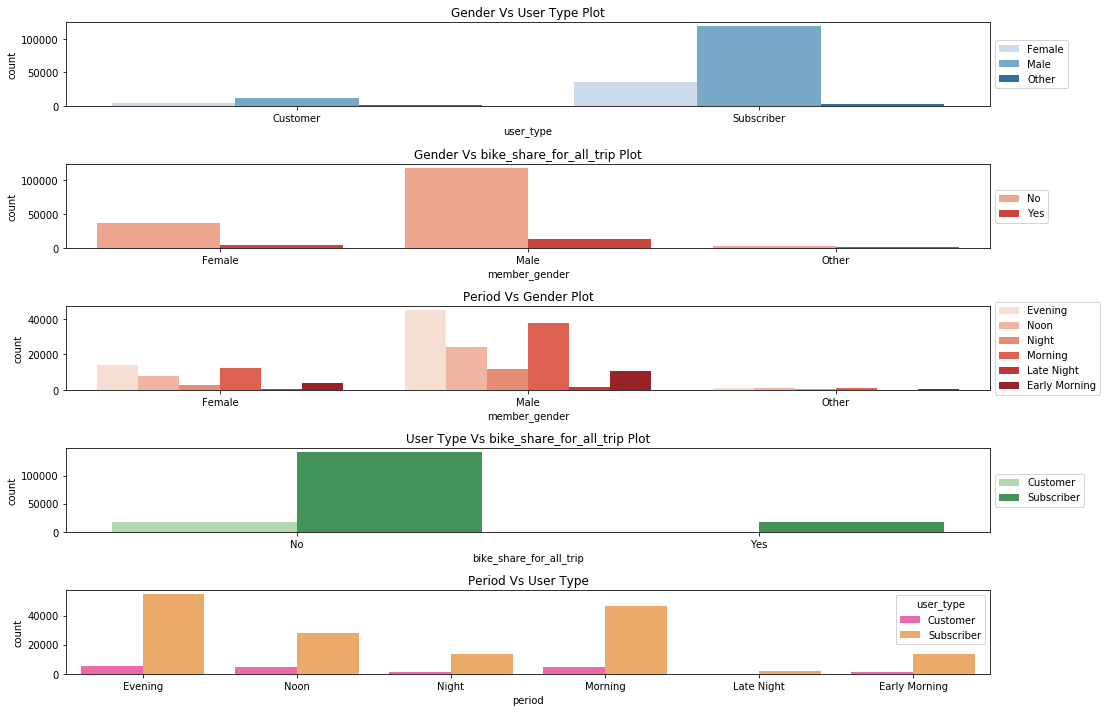

In [35]:
#Categorical values plot
plt.figure(figsize = [14, 10])
#'user_type', 'member_gender','bike_share_for_all_trip'
ax = plt.subplot(5, 1, 1)
sb.countplot(data = biketrips_clean, x = 'user_type', hue = 'member_gender', palette = 'Blues').set(title='Gender Vs User Type Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5))
# subplot 2: member_gender vs. bike_share_for_all_trip
ax = plt.subplot(5, 1, 2)
sb.countplot(data = biketrips_clean, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Reds').set(title='Gender Vs bike_share_for_all_trip Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5)) # re-arrange legend to reduce overlapping

# subplot 3: member_gender vs. Period of day
ax = plt.subplot(5, 1, 3)
sb.countplot(data = biketrips_clean, x = 'member_gender', hue = 'period', palette = 'Reds').set(title='Period Vs Gender Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5)) # re-arrange legend to reduce overlapping

# subplot 4: bike_share_for_all_trip vs. user_type, use different color palette
ax = plt.subplot(5, 1, 4)
sb.countplot(data = biketrips_clean, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Greens').set(title='User Type Vs bike_share_for_all_trip Plot')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5)) # re-arrange legend to remove overlapping

# subplot 5: period vs. user_type, use different color palette
plt.subplot(5, 1, 5)
sb.countplot(data = biketrips_clean, x = 'period', hue = 'user_type', palette = 'spring').set(title='Period Vs User Type')
ax.legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.tight_layout();
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
<b>Findings</b>
<ol>
  <li>Longest duration on a bike was by a Female</li>
  <li>Men tend to spend longer time on a ride</li>
</ol>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
<b>Findings</b>
<ol>
  <li>Male suscribers as well as Male consumers have a largest count</li>
</ol>
> checking out pass years variables which are user type and gender values having higher value to get higher trip duration but it is the opposite in 2019. For gender, value of male members is very high with 100000 count. For user type, value of female subscriber members is very high too with a count 0f 500000.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

in this part of Variate,I want to explore the analysis on trip on  how the three categorical measures of user type and gender into the relationship between trip duration_sec and age and  members birth year.



In [36]:
biketrips_clean.corr()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_minute,member_age
duration_sec,1.000000,0.012237,-0.040946,0.012854,-0.041438,0.011037,-0.006041,1.000000,0.006041
start_station_latitude,0.012237,1.000000,-0.678105,0.990130,-0.683552,0.051140,-0.075238,0.012237,0.075238
start_station_longitude,-0.040946,-0.678105,1.000000,-0.682598,0.992507,-0.144058,0.125346,-0.040946,-0.125346
end_station_latitude,0.012854,0.990130,-0.682598,1.000000,-0.685085,0.050507,-0.075339,0.012854,0.075339
end_station_longitude,-0.041438,-0.683552,0.992507,-0.685085,1.000000,-0.145895,0.126191,-0.041438,-0.126191
bike_id,0.011037,0.051140,-0.144058,0.050507,-0.145895,1.000000,0.036226,0.011037,-0.036226
member_birth_year,-0.006041,-0.075238,0.125346,-0.075339,0.126191,0.036226,1.000000,-0.006041,-1.000000
duration_minute,1.000000,0.012237,-0.040946,0.012854,-0.041438,0.011037,-0.006041,1.000000,0.006041
member_age,0.006041,0.075238,-0.125346,0.075339,-0.126191,-0.036226,-1.000000,0.006041,1.000000


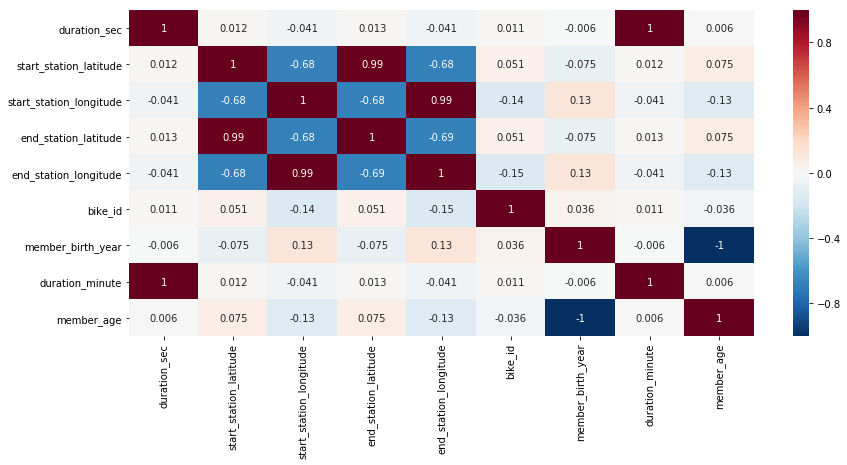

In [37]:
#plt.figure(figsize=(8,4))
plt.figure(figsize=[14,6])
sb.heatmap(
    biketrips_clean.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

There appears to be no significant correlation duration and age. There is however a negative correlation between latitude and longitude of the ride stations

Text(0.5,1,'Member Gender Vs Period Vs User Type')

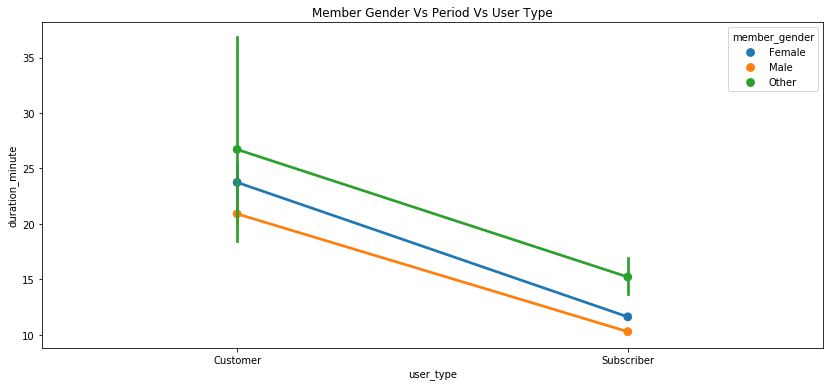

In [38]:
plt.figure(figsize=[14,6])
sb.pointplot(x="user_type", y="duration_minute", hue="member_gender", data=biketrips_clean);
plt.title("Member Gender Vs Period Vs User Type")

Females marginally have rides longer than males. Customers have a higher ride duration.

Text(0.5,1,'Duration in Minute Vs Period Vs User Type')

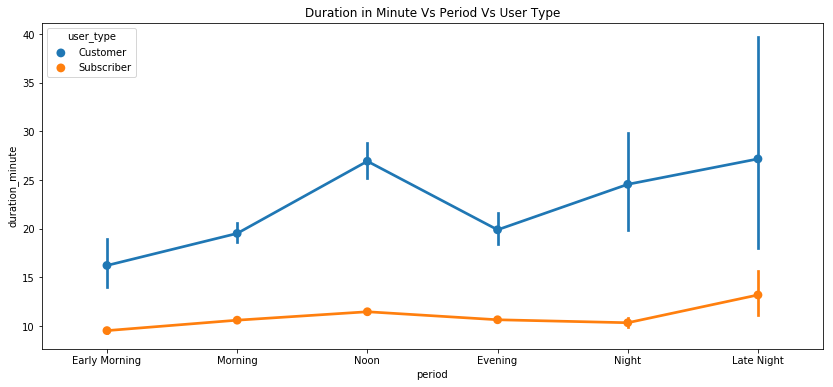

In [39]:
plt.figure(figsize=[14,6])
sb.pointplot(x="period", y="duration_minute", hue="user_type", data=biketrips_clean,order=[
                       'Early Morning',
                       'Morning',
                      'Noon',
                      'Evening',
                       'Night', 'Late Night']);
#plt.xticks(rotation=45)
plt.title("Duration in Minute Vs Period Vs User Type")

Early morning rides by subscribers have a shorter duration of about 10mins. Early morning rides by subscribers slightly take longer (above 15mins)

Text(0.5,1,'Member Gender Vs Member Age Vs Period')

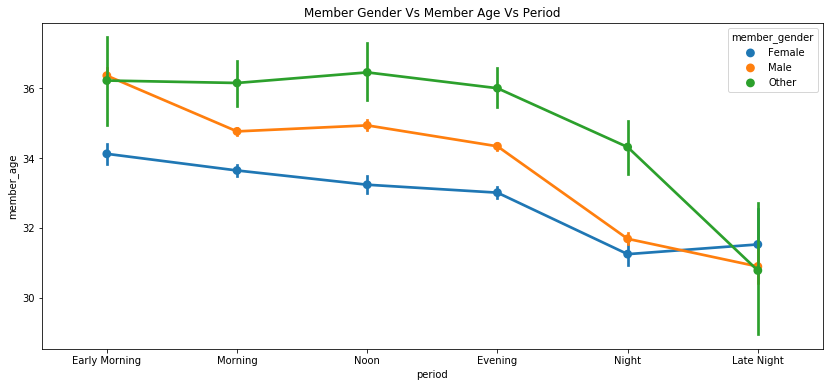

In [40]:
plt.figure(figsize=[14,6])
sb.pointplot(x="period", y="member_age", hue="member_gender", data=biketrips_clean, order=[
                       'Early Morning',
                       'Morning',
                      'Noon',
                      'Evening',
                       'Night', 'Late Night']);
#plt.xticks(rotation=45)
plt.title("Member Gender Vs Member Age Vs Period")

Night and Late Night rides are common with a younger population of between 30-32 years

Text(0.5,1,'Member Gender Vs Member Age Vs User Type')

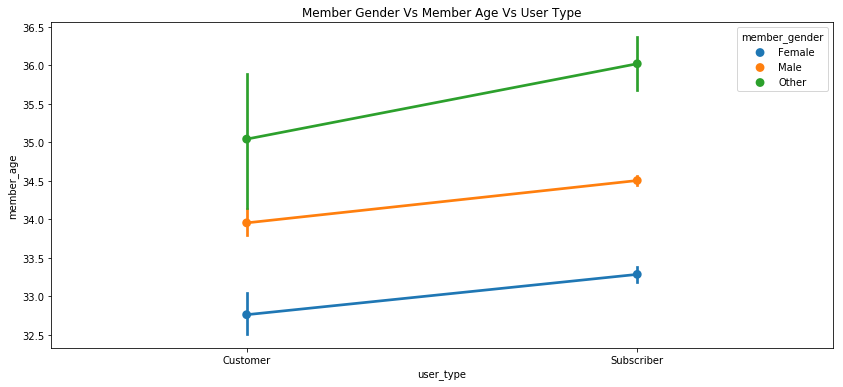

In [41]:
plt.figure(figsize=[14,6])
sb.pointplot(x="user_type", y="member_age", hue="member_gender", data=biketrips_clean);
plt.title("Member Gender Vs Member Age Vs User Type")

Males of either subscriber or customer types are slightly older than females. Others appear to be older than both

Text(0.5,1,'Member Gender Vs Member Age Vs Duration')

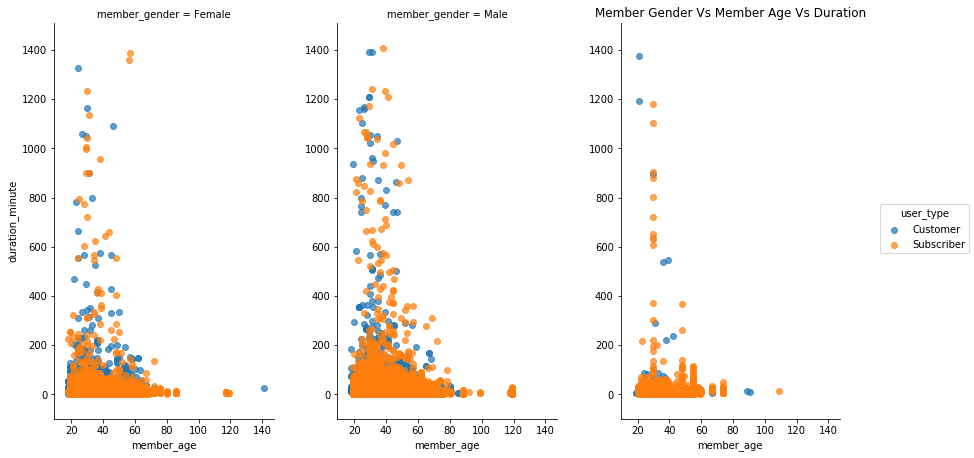

In [42]:
g = sb.FacetGrid(biketrips_clean, col="member_gender", hue="user_type")
g.map(plt.scatter, "member_age", "duration_minute", alpha=.7)
g.add_legend();

g.fig.set_size_inches(14,8);
plt.title("Member Gender Vs Member Age Vs Duration")

The pattern across gender is similar as there are no signaficant differences in duration of rides taken by different genders

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<ol>
  <li>Customers of any gender tend to spend more time on the rides than subscribers</li>
  <li>Subscribers of any gender tend to be older than customers of any gender</li>
</ol>

### Were there any interesting or surprising interactions between features?



## Conclusions

<ol>
  <li>There is no significant difference between pattern of ride across genders</li>
  <li>There are more sample records for the male gender than other genders</li>
    <li>It is not surprising that more rides take place in the morning and evenings than any other time of the day</li>
      <li>Older riders tend to be subscribers compared to younger demographics who are more of customers</li>
    <li>While it appears that males tend to spend more time on rides, this could be due to the sample size been skewed towards males</li>
</ol>